In [1]:
from anchor import utils
from anchor import anchor_tabular
import pandas as pd
import sklearn.ensemble
import numpy as np
from anchor import anchor_tabular
import os

In [2]:
dataset_folder = '../../../datasets/'
def filter_fn(data):
    to_remove = ['Does not meet the credit policy. Status:Charged Off',
        'Does not meet the credit policy. Status:Fully Paid',
        'In Grace Period', '-999', 'Current']
    for x in to_remove:
        data = data[data[:, 16] != x]
    return data
bad_statuses = set(["Late (16-30 days)", "Late (31-120 days)", "Default", "Charged Off"])
transformations = {
    16:  lambda x: np.array([y in bad_statuses for y in x]).astype(int),
    19:  lambda x: np.array([len(y) for y in x]).astype(int),
    6:  lambda x: np.array([y.strip('%') if y else -1 for y in x]).astype(float),
    35:  lambda x: np.array([y.strip('%') if y else -1 for y in x]).astype(float),
}
features_to_use = [2, 12, 13, 19, 29, 35, 51, 52, 109]
# features_to_use = [2, 12, 13, 19, 29] #, 35, 51, 52, 109]
categorical_features = [12, 109]
dataset = utils.load_csv_dataset(
    os.path.join(dataset_folder, 'lendingclub/LoanStats3a_securev1.csv'),
    16, ',',  features_to_use=features_to_use,
    feature_transformations=transformations, fill_na='-999',
    categorical_features=categorical_features, discretize=True,
    filter_fn=filter_fn, balance=True)
dataset.class_names = ['Good Loan', 'Bad Loan']
print(dataset.train[0])

[1. 0. 3. 0. 0. 3. 0. 0. 1.]


In [3]:
import sys
sys.path.append(sys.path[0] + '/../..')

import arg_explainer as ae
import dataset_manager
import testbench
import utils

nb_rows = 1000
experiment_name = 'lending'
dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=nb_rows)
print('Space size =', dm.space_size())
explainer = ae.ArgTabularExplainer(dm, experiment_name + '_' + str(nb_rows), compute=True, output_path='../../saves')
tb = testbench.Testbench(dm, exp_name=experiment_name)

tb.explore_full_dataset(16)
# tb.explore_neighborhoods(16)

Train 0.969
Test 0.8068783068783069
Space size = 245760
lending_1000
Generating arguments
len  1 : 0 ,  0
34 potential arg checked ( 0 not minimal)
len  2 : 47 ,  10
485 potential arg checked ( 0 not minimal)
len  3 : 252 ,  164
2951 potential arg checked ( 764 not minimal)
len  4 : 680 ,  1036
8793 potential arg checked ( 6405 not minimal)
len  5 : 578 ,  824
10428 potential arg checked ( 21812 not minimal)
len  6 : 54 ,  25
5545 potential arg checked ( 30778 not minimal)
len  7 : 6 ,  2
1573 potential arg checked ( 20389 not minimal)
len  8 : 0 ,  0
174 potential arg checked ( 6642 not minimal)
len  9 : 0 ,  0
0 potential arg checked ( 858 not minimal)
Total number of arguments:  3678
Saving to  ../../saves\lending_1000_minimals.df
lending_15360_fullsynth
Generating arguments
len  1 : 0 ,  0
36 potential arg checked ( 0 not minimal)
len  2 : 4 ,  0
575 potential arg checked ( 0 not minimal)
len  3 : 11 ,  0
5236 potential arg checked ( 112 not minimal)
len  4 : 347 ,  283
30342 poten

In [9]:
import networkx as nx

dm = dataset_manager.DatasetManager(dataset, classifier=None, nb_rows=None)
c = dm.get_classifier()

for nb_rows in utils.make_slices(dm.get_nb_rows(), 10):
    dm = dataset_manager.DatasetManager(dataset, classifier=c, nb_rows=nb_rows)
    explainer = ae.ArgTabularExplainer(dm, 'lendingshort_' + str(nb_rows), compute=True, output_path='../../saves', verbose=False)
    G = explainer.build_attack_graph(compute=True, display_graph=False)
    print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))
    print('nodes:', len(G.nodes()))
    print('edges:', len(G.edges()))
    print('naive extensions:', nx.graph_number_of_cliques(nx.complement(G)))

Train 0.6360529217199559
Test 0.5687830687830688
lendingshort_907
Total number of arguments:  315
Saving to  ../../saves\lendingshort_907_minimals.df
edges per node: 2.673015873015873
nodes: 315
edges: 421


[308, 317, 294, 262, 220, 209, 192, 183, 176, 406]
(907, 1814, 2721, 3628, 4535, 5442, 6349, 7256, 8163, 9070) (317, 343, 366, 373, 377, 387, 392, 393, 398, 396)


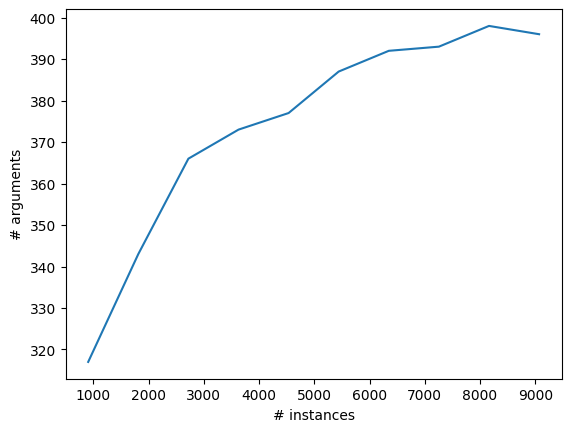

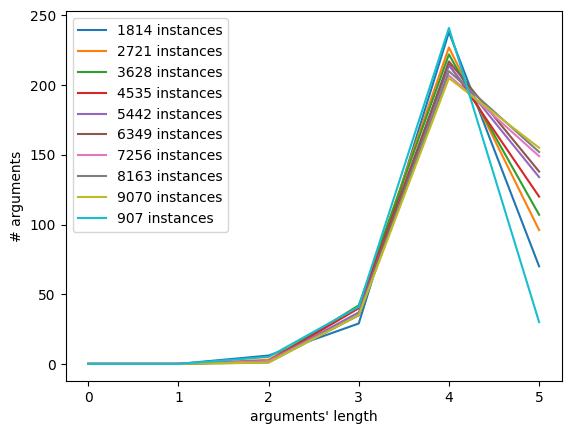

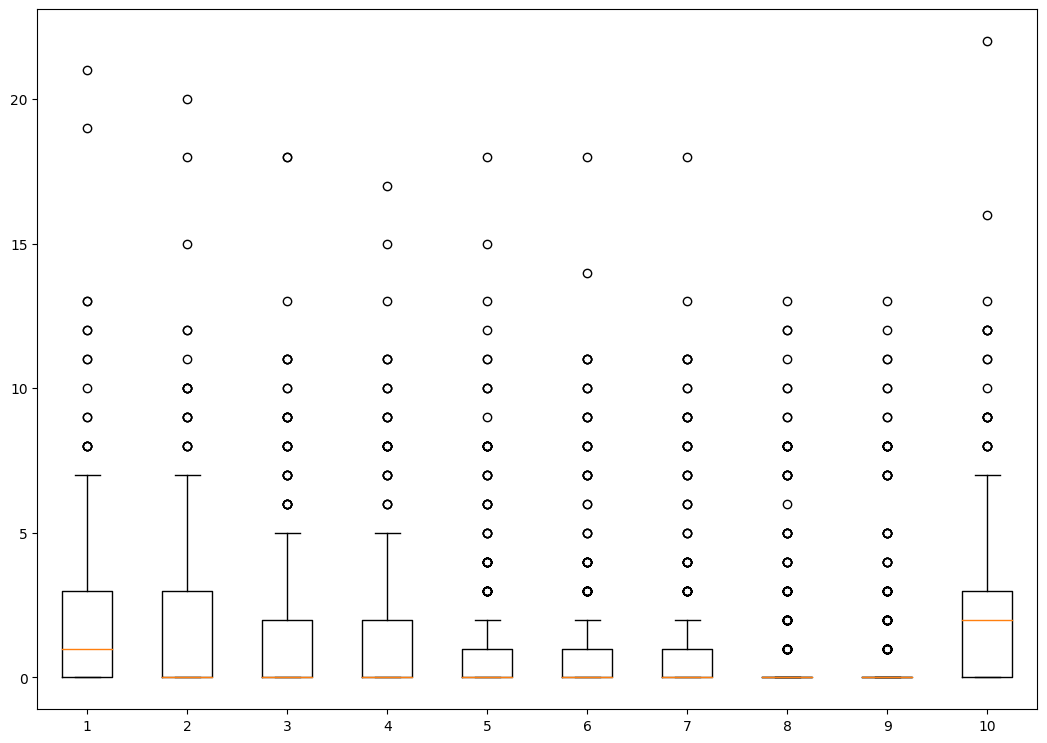

(9070, 8163, 7256, 6349, 5442, 4535, 3628, 2721, 1814, 907) (0.7727272727272727, 0.7613065326633166, 0.7455470737913485, 0.7091836734693877, 0.6925064599483204, 0.6206896551724138, 0.5737265415549597, 0.540983606557377, 0.49271137026239065, 0.3028391167192429)


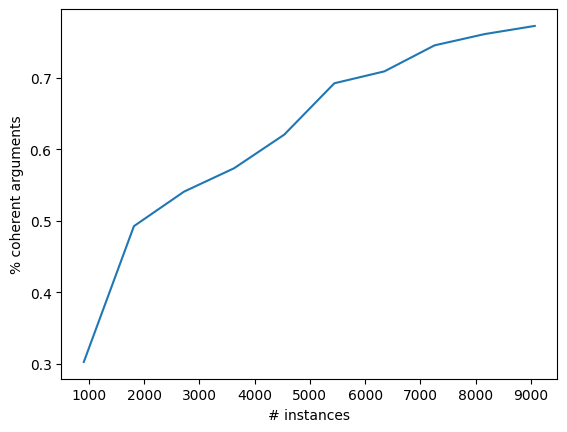

In [8]:
explainer.af_analysis(remove=['20', '50', '100', '432', '864', '1296', '1728', '2160', '2592', '3024', '3456', '3888', '4320', '4752', '5184', '5616', '6048', '6480', '6912', '13824', '20736', '27648', '34560', '41472', '48384', '55296', '62208', '69120', '76032', '82944', '89856', '96768', '103680', '110592'])

In [12]:
G = explainer.build_attack_graph(compute=True, display_graph=False)
print('edges per node:', np.mean([len(G.edges(n)) for n in G.nodes()]))

explainer.export_graph('asp', '../../saves')
print(len(G.nodes()))

lendingshort_50
edges per node: 11.669724770642201
109
